We are going to learn how to use Qiskit to build up a quantum circuit, execute a job, and view the result.

In [1]:
import qiskit
import numpy as np
dir(qiskit)

['Aer',
 'BasicAer',
 'ClassicalRegister',
 'IBMQ',
 'QiskitError',
 'QuantumCircuit',
 'QuantumRegister',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__qiskit_version__',
 '__spec__',
 '__version__',
 '_get_qiskit_versions',
 'aqua',
 'assemble',
 'assembler',
 'circuit',
 'compiler',
 'converters',
 'dagcircuit',
 'exceptions',
 'execute',
 'extensions',
 'ignis',
 'pkgutil',
 'providers',
 'pulse',
 'qasm',
 'qiskit',
 'qobj',
 'quantum_info',
 'result',
 'tools',
 'transpile',
 'transpiler',
 'user_config',
 'util',
 'validation',
 'version',
 'visualization',
 'warnings']

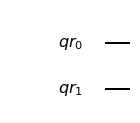

In [2]:
qr = qiskit.QuantumRegister(2, name='qr')
qc = qiskit.QuantumCircuit(qr, name='qc')
qc.draw(output='mpl')

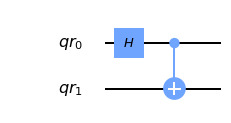

In [3]:
qc.h(qr[0])
qc.cx(qr[0], qr[1])

qc.draw(output='mpl')

In [4]:
backend = qiskit.Aer.get_backend('statevector_simulator')
qiskit.Aer.backends()

[<QasmSimulator('qasm_simulator') from AerProvider()>,
 <StatevectorSimulator('statevector_simulator') from AerProvider()>,
 <UnitarySimulator('unitary_simulator') from AerProvider()>]

In [5]:
job = qiskit.execute(qc, backend)

In [6]:
ket = job.result().get_statevector()

for amplitude in ket:
    print('{:.3}'.format(np.abs(amplitude ** 2)), end=' ')

0.5 0.0 0.0 0.5 

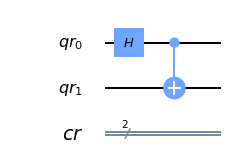

In [7]:
cr = qiskit.ClassicalRegister(2, name='cr')
qc.add_register(cr)

qc.draw(output='mpl')

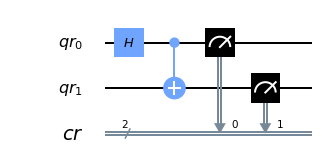

In [8]:
qc.measure(qr[0], cr[0])
qc.measure(qr[1], cr[1])

qc.draw(output='mpl')

{'11': 4094, '00': 4098}
11:  0.499755859375
00:  0.500244140625


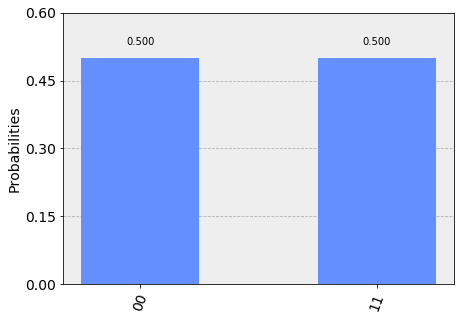

In [9]:
emulator = qiskit.Aer.get_backend('qasm_simulator')
job = qiskit.execute(qc, emulator, shots=8192)

hist = job.result().get_counts()
print(hist)

for state in hist:
    print(state + ': ', int(hist[state]) / sum(hist.values()))

qiskit.visualization.plot_histogram(hist)

In [10]:
job = qiskit.execute(qc, emulator, shots=10, memory=True)
job.result().get_memory()

['00', '11', '11', '00', '11', '00', '00', '11', '00', '11']

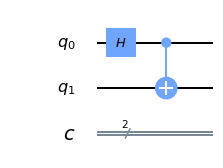

In [11]:
qc = qiskit.QuantumCircuit(2, 2, name='simplified')
qc.h(0)
qc.cx(0, 1)

qc.draw(output='mpl')

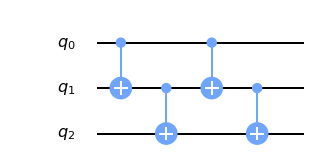

In [12]:
sub_circuit = qiskit.QuantumCircuit(3, name='sub')
sub_circuit.cx(0, 1)
sub_circuit.cx(1, 2)
sub_circuit.cx(0, 1)
sub_circuit.cx(1, 2)

sub_circuit.draw(output='mpl')

In [13]:
new_gate = sub_circuit.to_instruction()

qr = qiskit.QuantumRegister(4)
new_qc = qiskit.QuantumCircuit(qr, name='new qc')

new_qc.append(new_gate, [qr[1],qr[2],qr[3]])

new_qc.draw(output='text')

In [14]:
qiskit.IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [15]:
provider = qiskit.IBMQ.get_provider(hub='ibm-q')
provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_vigo') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_ourense') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_london') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_burlington') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_essex') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>]

In [16]:
for backend in provider.backends():
    print(backend.status())

BackendStatus(backend_name='ibmq_qasm_simulator', backend_version='0.1.547', operational=True, pending_jobs=0, status_msg='active')
BackendStatus(backend_name='ibmqx2', backend_version='2.0.5', operational=True, pending_jobs=2, status_msg='active')
BackendStatus(backend_name='ibmq_16_melbourne', backend_version='2.0.4', operational=True, pending_jobs=5, status_msg='active')
BackendStatus(backend_name='ibmq_vigo', backend_version='1.0.2', operational=True, pending_jobs=8, status_msg='active')
BackendStatus(backend_name='ibmq_ourense', backend_version='1.0.1', operational=True, pending_jobs=7, status_msg='active')
BackendStatus(backend_name='ibmq_london', backend_version='1.0.0', operational=True, pending_jobs=14, status_msg='active')
BackendStatus(backend_name='ibmq_burlington', backend_version='1.1.4', operational=True, pending_jobs=3, status_msg='active')
BackendStatus(backend_name='ibmq_essex', backend_version='1.0.1', operational=True, pending_jobs=4, status_msg='active')
BackendSta

In [17]:
real_device = provider.get_backend('ibmq_16_melbourne')

properties = real_device.properties()
coupling_map = real_device.configuration().coupling_map
noise_model = qiskit.providers.aer.noise.device.basic_device_noise_model(properties)

In [18]:
qc = qiskit.QuantumCircuit(2,2)
qc.h(0)
qc.cx(0, 1)
qc.measure(0,0)
qc.measure(1,1)

job = qiskit.execute(qc, emulator, shots=1024, noise_model=noise_model,
                    coupling_map=coupling_map,
                    basis_gates=noise_model.basis_gates)

job.result().get_counts()

{'01': 73, '10': 169, '00': 351, '11': 431}